In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
rnd = np.random.RandomState(43)

In [3]:
colors = cm.Set1(np.linspace(0, 1, 9))

In [4]:
def get_rms_theta_pairprod_exp(E, nu):
    norm = 1e3
    n = -1
    a = 8.9e-4
    b = 1.5e-5
    c = 0.032
    d = 1
    e = 0.1
    # m = 105.7 / norm
    m_e =   0.5110 / norm
    # E = E * const.e * 1e9 / const.c**2
    # nu = (E - E_) / (E - m)
    minimum = np.min([a * nu**(1/4) * (1 + b*E) + c * nu / (nu + d), e])
    theta = (2.3 + np.log(E)) * (1- nu)**n / E * (nu - 2 * m_e/E)**2 / nu**2 * minimum
    return theta

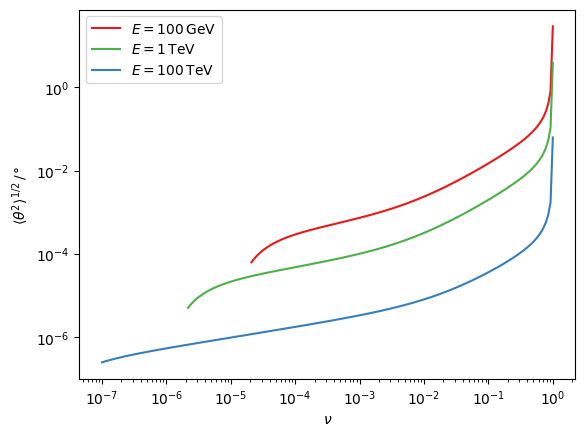

In [5]:
E = 1e2 # in GeV ausgedrückt
nu = np.logspace(-7, -0.001, 200)
nu = nu[nu>4 * 511e-6/(E)]
thetas = [get_rms_theta_pairprod_exp(E, nus) for nus in nu]
plt.plot(nu, np.rad2deg(thetas), '-', color=colors[0], label=r'$E = 100\,$GeV')

E = 1e3 # in GeV ausgedrückt
nu = np.logspace(-7, -0.001, 200)
nu = nu[nu>4 * 511e-6/(E)]
thetas = [get_rms_theta_pairprod_exp(E, nus) for nus in nu]
plt.plot(nu, np.rad2deg(thetas), '-', color=colors[2], label=r'$E = 1\,$TeV')


E = 1e5 # in GeV ausgedrückt
nu = np.logspace(-7, -0.001, 200)
nu = nu[nu>4 * 511e-6/(E)]
thetas = [get_rms_theta_pairprod_exp(E, nus) for nus in nu]
plt.plot(nu, np.rad2deg(thetas), '-', color=colors[1], label=r'$E = 100\,$TeV')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.legend()
# plt.savefig('pairprod_plots/pairprod_rms_theta_degree.pdf')